In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.spatial import Delaunay, ConvexHull
from scipy.spatial.distance import cdist

Load the data

In [2]:
outputdatapath = r'C:\Users\mar886\WaterTableProject\Willunga\willunga_wt\output_data'

df = pd.read_csv(os.path.join(outputdatapath, "well_summary_gdf_ss_a.csv"))
df.head()

,DHNO,DHNO.1,Unit_No,Unit_Number,dh_name,network,Obs_No,drillhole_class,water_point_type_code,Aquifer,...,map_2_5k,map_1k,water_info,salinity,water_chemistry,geophys_log,drill_log,lith_log,geometry,Datetime
0,26558,26558,6527-562,652700562,WLG 40,MCL_VALE,WLG040,WW,NaN,Te2,...,l,2,Y,Y,Y,Y,Y,Y,POINT (268941.81 6093083.52),2021-08-09
1,26565,26565,6527-569,652700569,NaN,MCL_VALE,WLG044,WW,NaN,Te2,...,d,1,Y,Y,Y,Y,Y,Y,POINT (270906.82 6096136.56),2021-10-09
2,26585,26585,6527-589,652700589,NaN,MCL_VALE,WLG019,WW,NaN,Qpa,...,n,3,Y,Y,N,Y,N,N,POINT (272506.29 6097255.78),2021-10-09
3,27050,27050,6527-1054,652701054,MAR SITE 12,MCL_VALE,WLG049,WW,NaN,Tomw,...,n,3,Y,Y,Y,N,Y,N,POINT (271897.13 6092138.11),2021-11-19
4,27063,27063,6527-1067,652701067,NaN,MCL_VALE,WLG057,WW,NaN,Qpa,...,d,6,Y,Y,Y,Y,Y,Y,POINT (270438.32 6089954.64),2021-10-09


In [3]:
df.columns
print(df["rswl"])

0       4.09
1       4.33
2      18.22
3       5.54
4      15.90
       ...  
68    129.42
69    184.26
70    131.49
71    131.85
72    128.99
Name: rswl, Length: 73, dtype: float64


Text(0, 0.5, 'Latitude')

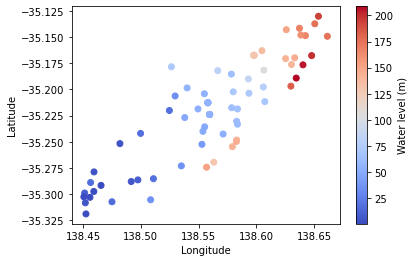

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

s = ax.scatter(df.decimal_long, df.neg_decimal_lat, c=df.rswl, cmap="coolwarm")
cb = plt.colorbar(s)
cb.set_label('Water level (m)')

plt.xlabel("Longitude")
plt.ylabel("Latitude")

In [5]:
X = df[["decimal_long", "neg_decimal_lat"]].values
y = df["rswl"].values

Define a grid within the hull of observed data (just a quick way to make a grid that fits within the extent of the area of interest - could use a shape file or something instead):

In [6]:
n = 50
xi = np.linspace(X[:, 0].min(), X[:, 0].max(), n)
yi = np.linspace(X[:, 1].min(), X[:, 1].max(), n)
xi, yi = np.meshgrid(xi, yi)
Xnew = np.vstack((xi.flatten(), yi.flatten())).T
'''
plt.title('Grid no mask')
plt.scatter(xi, yi, c='k', alpha=0.5, s=1)
hull = ConvexHull(X)
plt.plot(X[hull.vertices,0], X[hull.vertices,1], 'r--', lw=2)
#plt.show()
'''

"\nplt.title('Grid no mask')\nplt.scatter(xi, yi, c='k', alpha=0.5, s=1)\nhull = ConvexHull(X)\nplt.plot(X[hull.vertices,0], X[hull.vertices,1], 'r--', lw=2)\n#plt.show()\n"

In [7]:
mask = Delaunay(X).find_simplex(Xnew)>=0
Xnew = Xnew[mask]

print(mask)

[False False False ... False False False]


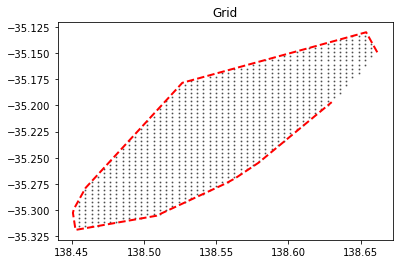

In [8]:
plt.title('Grid')
plt.scatter(Xnew[:, 0], Xnew[:, 1], c='k', alpha=0.5, s=1)
hull = ConvexHull(X)
plt.plot(X[hull.vertices,0], X[hull.vertices,1], 'r--', lw=2)
plt.show()

### Make grid based on shapefile

In [9]:
study_extent_file = os.path.join(outputdatapath,
                               "study_area_extent.shp")

study_extent_gdf = gpd.read_file(study_extent_file)

<AxesSubplot:>

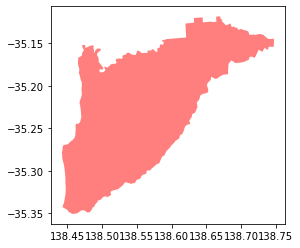

In [10]:
study_extent_gdf.head()
#study_extent_gdf=study_extent_gdf.to_crs('epsg:32755')

study_extent_gdf.head()

plt.figure()
ax=plt.subplot(111)
study_extent_gdf.plot(ax=ax, color="r", alpha=0.5, linewidth=2, label="Study area")


In [11]:
study_extent_gdf.total_bounds

array([138.44244983, -35.35049861, 138.74735324, -35.11842853])

<AxesSubplot:title={'center':'Grid no mask'}>

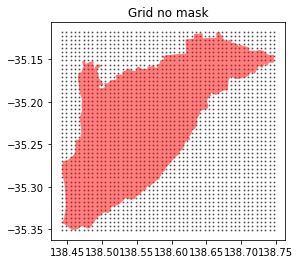

In [12]:
n = 50
xi = np.linspace(study_extent_gdf.total_bounds[0], study_extent_gdf.total_bounds[2], n)
yi = np.linspace(study_extent_gdf.total_bounds[1], study_extent_gdf.total_bounds[3], n)
xi, yi = np.meshgrid(xi, yi)
Xnew = np.vstack((xi.flatten(), yi.flatten())).T

plt.title('Grid no mask')
ax=plt.subplot(111)
ax.scatter(xi, yi, c='k', alpha=0.5, s=1)
study_extent_gdf.plot(ax=ax,color="r", alpha=0.5, linewidth=2, label="Study area")

#plt.show()


In [13]:
#print(len(X))
#print(len(xi))
#print(xi)
#print(np.shape(xi))
#print(len(yi))
#type(Xnew)
#np.shape(Xnew)
print(Xnew)

[[138.44244983 -35.35049861]
 [138.44867235 -35.35049861]
 [138.45489487 -35.35049861]
 ...
 [138.73490821 -35.11842853]
 [138.74113072 -35.11842853]
 [138.74735324 -35.11842853]]


In [14]:
from shapely.geometry import Polygon, LineString, Point

point1 = Point(138.5596182, -35.2239105)
point2 = Point(138.5980052, -35.1673645)

points = gpd.GeoSeries([point1, point2])
points=points.set_crs(study_extent_gdf.crs)

### Turn all points from grid into a geoseries

Then they can be used with intersection/geospatial tools to remove points that aren't contained by shapefile

In [15]:
s = gpd.GeoSeries(map(Point, Xnew))
s.head()

0    POINT (138.44245 -35.35050)
1    POINT (138.44867 -35.35050)
2    POINT (138.45489 -35.35050)
3    POINT (138.46112 -35.35050)
4    POINT (138.46734 -35.35050)
dtype: geometry

In [16]:
print(s.crs)
s = s.set_crs(study_extent_gdf.crs)
print(s.crs)

None
epsg:4283


In [17]:
print(type(study_extent_gdf))
print(study_extent_gdf.index)
print(study_extent_gdf.columns)
print(type(s))
print(s.index)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex(start=0, stop=1, step=1)
Index(['OBJECTID', 'SHAPE_Leng', 'SHAPE_Area', 'geometry'], dtype='object')
<class 'geopandas.geoseries.GeoSeries'>
RangeIndex(start=0, stop=2500, step=1)


### Find all grid points that intersect with the study area

In [18]:
s_icpt = study_extent_gdf.contains(s, align=True)
s_icpt.head()

C:\Users\mar886\Anaconda3\envs\geo_env\lib\site-packages\geopandas\base.py:31: UserWarning: The indices of the two GeoSeries are different.
  warn("The indices of the two GeoSeries are different.")


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [19]:
type(s_icpt)
np.shape(s_icpt)

(2500,)

In [20]:
s_clip = s.clip(study_extent_gdf)
s_clip.head()
print(len(s))
print(len(s_clip))

2500
1074


<AxesSubplot:>

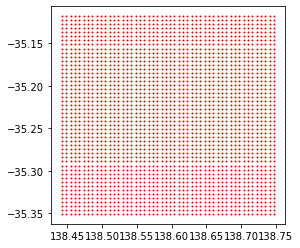

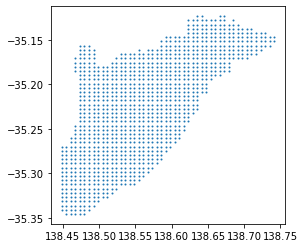

In [21]:
s_clip.head()
s.plot(color="r",markersize=1)
s_clip.plot(markersize=1)

## Save the grid

So I can use it for other geospatial stuff

In [25]:
s_clip.to_file(os.path.join(outputdatapath,'willunga_regular_grid.shp'))  

### Get array of grid locations

From the Geoseries

In [155]:
print(type(s_clip))
print(np.shape(s_clip))
print(type(Xnew))
print(np.shape(Xnew))

print(Xnew[0])
type(Xnew[0])

<class 'geopandas.geoseries.GeoSeries'>
(1074,)
<class 'numpy.ndarray'>
(2500, 2)
[138.44244983 -35.35049861]


numpy.ndarray

In [160]:
from shapely.geometry import shape

s_clip.head()
s_clip.y
s_clip.x

list_sclip = []

for i in s_clip.index:
    pointval = s_clip.loc[i]
    list_sclip.append(np.asarray([pointval.x, pointval.y]))

In [167]:
arr_sclip = np.asarray(list_sclip)

print(arr_sclip)

print(type(arr_sclip))
print(arr_sclip[0])
print(type(arr_sclip[0]))
print(np.shape(arr_sclip))

print(len(X))
print(len(y))

[[138.72246317 -35.14684527]
 [138.71624065 -35.14684527]
 [138.71624065 -35.14210915]
 ...
 [138.4673399  -35.31260962]
 [138.48600746 -35.31260962]
 [138.46111738 -35.31260962]]
<class 'numpy.ndarray'>
[138.72246317 -35.14684527]
<class 'numpy.ndarray'>
(1074, 2)
73
73


Define the spherical covariance function:

In [168]:
def spherical(X1, X2, a, b):
    """
    Spherical covariance.

    Parameters
    ----------
    X1:array
        Array of coordinates.
    X2:array
        Array of coordinates.
    a:float
        Range
    b:float
        Sill

    References
    -----------
    Wackernagel, H., 1995. Geostatistics, in: Multivariate Geostatistics.
    Springer Berlin Heidelberg, Berlin, Heidelberg, pp. 74–81.
    https://doi.org/10.1007/978-3-662-03098-1_11
    """
    h = cdist(X1, X2)
    cv = b * (1 - 3/2 * h/a + 1/2 * h**3 / a**3)
    return cv

Define the Ordinary Kriging algorithm:

In [169]:
def Ordinary(Kii, Kij, Kjj, y):
    """
    The Ordinary kriging algorithm.

    Parameters
    ----------
    Kii:array
        (n, n) covariance matrix of observations locations with observations
        locations.
    Kij:array
        (n, m) covariance matrix of observations locations with prediction
        locations.
    Kjj:array
        (m, m) covariance matrix of prediction locations with prediction
        locations.
    y:array
        (1, n) array of the data.

    Returns
    --------
    mu:array
        (1, m) array of mean estimates.
    cov:array
        (m,m) array of covariances.
    """
    n, m = np.size(Kii, axis=0), np.size(Kjj,axis=0)
    Cii = np.ones((n + 1, n + 1))
    Cii[:n, :n] = Kii
    Cii[-1, -1] = 0
    Cij = np.ones((n + 1, m))
    Cij[:n, :] = Kij
    w = np.linalg.solve(Cii, Cij)
    cov = Kjj - w.T.dot(Cij)
    mu = w[:n].T.dot(y)
    return mu, cov

Use the variogram parameters found in gstat:

In [170]:
l = 15328.54 #range
sigma = 40#16.084945 #sill
alpha = 3#3.323137 #nugget/microscale variability

Define the covariance:

In [171]:
Kii = spherical(X, X, l, sigma) + np.eye(y.size) * alpha #covariance between observation locations (with regularisation added to the diagonal of the matrix)
Kij = spherical(X, arr_sclip, l, sigma)    #covariance between and prediction locations
Kjj = spherical(arr_sclip, arr_sclip, l, sigma) #covariance between prediction locations

In [172]:
mu, cov = Ordinary(Kii, Kij, Kjj, y) #krige
var = np.diag(cov) #get the variance from the diagonal of the covariance matrix

Plot mean

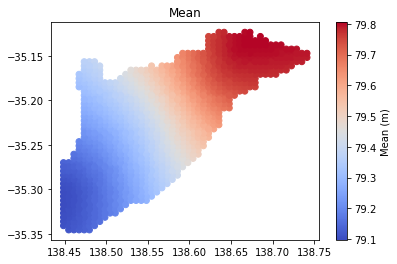

In [183]:
plt.title('Mean')
plt.scatter(arr_sclip[:, 0], arr_sclip[:, 1], c=mu, cmap="coolwarm")
plt.colorbar(label='Mean (m)')
plt.show()

Plot variance

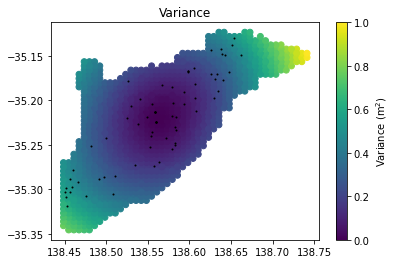

In [182]:
plt.title('Variance')
plt.scatter(arr_sclip[:, 0], arr_sclip[:, 1], c=var)

s = plt.scatter(df.decimal_long, df.neg_decimal_lat, c="k", s=1)

plt.colorbar(label='Variance (m$^2$)')
plt.show()